# Análise da relação de alunos com projetos filiados do programa Meninas Digitais

In [1]:

# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/anlise-de-impacto-do-programa-meninas-digitais/alunos_projeto.csv
/kaggle/input/anlise-de-impacto-do-programa-meninas-digitais/Projetos Meninas Digitais (01_08_2022).csv
/kaggle/input/anlise-de-impacto-do-programa-meninas-digitais/Copy of Projetos Meninas Digitais - Tabela de AGOSTO (01_08_2022).csv
/kaggle/input/dados-inep-2019-teste/SUP_LOCAL_OFERTA_2012.CSV
/kaggle/input/dados-inep-2019-teste/SUP_CURSO_2009.CSV
/kaggle/input/dados-inep-2019-teste/SUP_IES_2009_2019.csv
/kaggle/input/dados-inep-2019-teste/SUP_ALUNO_2009_2019_ORIGINAL_TIC.csv
/kaggle/input/dados-inep-2019-teste/SUP_ALUNO_2014.CSV
/kaggle/input/dados-inep-2019-teste/SUP_CURSO_2016.CSV
/kaggle/input/dados-inep-2019-teste/SUP_ALUNO_2010.CSV
/kaggle/input/dados-inep-2019-teste/SUP_ALUNO_2016.CSV
/kaggle/input/dados-inep-2019-teste/SUP_IES_2012.CSV
/kaggle/input/dados-inep-2019-teste/SUP_DOCENTE_2015.CSV
/kaggle/input/dados-inep-2019-teste/SUP_LOCAL_OFERTA_2009_2019.csv
/kaggle/input/dados-inep-2019-teste/SUP_

## Importando dados e Funções

In [2]:
import numpy as np
import pandas as pd

In [3]:
dados_alunos = pd.read_csv('/kaggle/input/dados-inep-2019-teste/SUP_ALUNO_2009_2019_COMPLETO_TIC.csv', sep='|', encoding='ISO-8859-1')
dados_alunos.head()

,NU_ANO_CENSO,CO_IES,TP_CATEGORIA_ADMINISTRATIVA,TP_ORGANIZACAO_ACADEMICA,CO_CURSO,CO_CURSO_POLO,TP_TURNO,TP_GRAU_ACADEMICO,TP_MODALIDADE_ENSINO,TP_NIVEL_ACADEMICO,...,IN_MATRICULA,IN_CONCLUINTE,IN_INGRESSO_TOTAL,IN_INGRESSO_VAGA_NOVA,IN_INGRESSO_PROCESSO_SELETIVO,NU_ANO_INGRESSO,target,TEM_DEFICIENCIA,FINANCIAMENTO_REEMBOLSAVEL,FINANCIAMENTO_NAO_REEMBOLSAVEL
0,2009,588,1,1,69282,NaN,NaN,3.0,1,1,...,0,0,0,NaN,0.0,2006,1,0,0,0
1,2009,1107,6,3,72070,NaN,NaN,3.0,1,1,...,1,0,0,NaN,0.0,2008,0,0,0,0
2,2009,1258,6,3,19931,NaN,NaN,1.0,1,1,...,1,0,1,NaN,1.0,2009,0,0,0,0
3,2009,161,6,2,18180,NaN,NaN,1.0,1,1,...,1,0,0,NaN,0.0,2008,0,0,0,0
4,2009,4101,6,3,80910,NaN,NaN,3.0,1,1,...,1,0,0,NaN,0.0,2007,0,0,0,0


In [4]:
dados_meninas = pd.read_csv('/kaggle/input/anlise-de-impacto-do-programa-meninas-digitais/Copy of Projetos Meninas Digitais - Tabela de AGOSTO (01_08_2022).csv')
dados_meninas.head()

,Válido,Nome do Projeto,Status,Ano,Ano de Finalização,Contato,Cidade,Estado,Universidade,Campus,Nome do Projeto - Ativos,Código IES,Código Curso
0,True,#include,Ativo,2021,-,includegirls@facom.ufu.br,Uberlândia,MG,Universidade Federal de Uberlândia,Campus Santa Mônica/Reitoria,#include<girls>,17,"1452, 115728, 1187249"
1,True,#include < GURIAS >,Ativo,2018,-,include.gurias@gmail.com,Guaíba,RS,Universidade Estadual do Rio Grande do Sul,NaN,Include Gurias,-,-
2,True,#include < meninas.uff >,Ativo,2016,-,http://www2.ic.uff.br/~includemeninas/,Niterói,RJ,Universidade Federal Fluminense,"Campus da Praia Vermelha, Campus do Gragoatá, ...",#include (meninas.uff),572,"12710, 1122221"
3,False,ADA Code – Meninas Digitais Rondônia,Concluído,2017,2017,https://www.facebook.com/adacodero/,Porto Velho – RO,NaN,IFRO – Campus Porto Velho Calama,NaN,NaN,NaN,NaN
4,True,ADAs​,Ativo,2017,-,https://sites.google.com/view/projeto-adas,Goiânia,GO,"Instituto de Informática, Campus Samambaia – UFG",Campus Samambaia,Projeto ADAs,584,"14098, 121570, 123429"


Selecionando apenas os dados de projetos válidos

In [5]:
dados_meninas = dados_meninas.loc[dados_meninas.Válido == True]
dados_meninas.Válido.unique()

array([ True])

In [6]:
dados_meninas['Código IES'].isnull().mean()

0.11688311688311688

selecionando apenas os projetos com universidades associadas

In [7]:
dados_meninas = dados_meninas.loc[(dados_meninas['Código IES'] != '-') & (~dados_meninas['Código IES'].isna())]

In [8]:
dados_meninas['Código IES'].unique()

array(['17', '572', '584', '719', '586', '575', '601', '756', '43', '580',
       '4925', '57', '4', '3172', '15520', '1807', '3162', '588', '583',
       '14724', '55', '5322', '579', '577', '1811', '1813', '3279', '599',
       '4504', '3164', '574', '532', '3543', '1303', '3183', '423', '585',
       '76', '8', '569', '2', '589', '590', '3189', '344'], dtype=object)

In [9]:
dados_meninas['Ano'] = pd.to_numeric(dados_meninas.Ano)
dados_meninas['Código IES'] = dados_meninas['Código IES'].astype('int')

In [10]:
dados_meninas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56 entries, 0 to 149
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Válido                    56 non-null     bool  
 1   Nome do Projeto           56 non-null     object
 2   Status                    56 non-null     object
 3   Ano                       56 non-null     int64 
 4   Ano de Finalização        56 non-null     object
 5   Contato                   56 non-null     object
 6   Cidade                    56 non-null     object
 7   Estado                    56 non-null     object
 8   Universidade              56 non-null     object
 9   Campus                    56 non-null     object
 10  Nome do Projeto - Ativos  56 non-null     object
 11  Código IES                56 non-null     int64 
 12  Código Curso              55 non-null     object
dtypes: bool(1), int64(2), object(10)
memory usage: 5.7+ KB


Selecionando apenas os projetos que surgiram até 2019

In [11]:
dados_meninas = dados_meninas.loc[dados_meninas.Ano <= 2019]

<AxesSubplot:xlabel='Ano'>

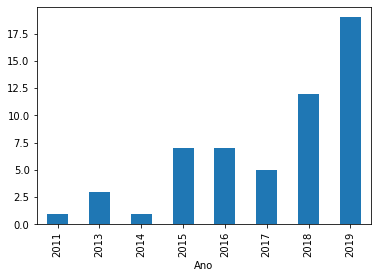

In [12]:
dados_meninas.groupby(['Ano'])['Ano'].count().plot(kind='bar')

<AxesSubplot:xlabel='TP_MODALIDADE_ENSINO'>

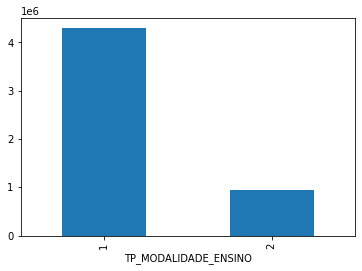

In [13]:
dados_alunos.groupby(['TP_MODALIDADE_ENSINO'])['TP_MODALIDADE_ENSINO'].count().plot(kind='bar')

Selecionando apenas os alunos de cursos presenciais

In [14]:
dados_alunos = dados_alunos.loc[dados_alunos.TP_MODALIDADE_ENSINO == 1]

<AxesSubplot:xlabel='TP_MODALIDADE_ENSINO'>

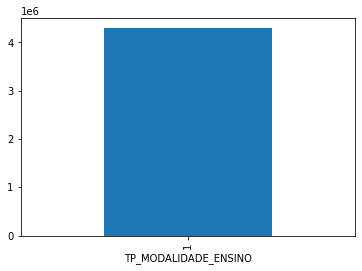

In [15]:
dados_alunos.groupby(['TP_MODALIDADE_ENSINO'])['TP_MODALIDADE_ENSINO'].count().plot(kind='bar')

<AxesSubplot:xlabel='TP_CATEGORIA_ADMINISTRATIVA'>

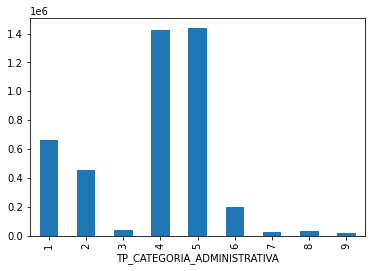

In [16]:
dados_alunos.groupby(['TP_CATEGORIA_ADMINISTRATIVA'])['TP_CATEGORIA_ADMINISTRATIVA'].count().plot(kind='bar')

Selecionando apenas alunos de universidades públicas estaduais, federais e municipais

In [17]:
dados_alunos = dados_alunos.loc[(dados_alunos.TP_CATEGORIA_ADMINISTRATIVA == 1) | 
                                (dados_alunos.TP_CATEGORIA_ADMINISTRATIVA == 2) | 
                                (dados_alunos.TP_CATEGORIA_ADMINISTRATIVA == 3)]

<AxesSubplot:xlabel='TP_CATEGORIA_ADMINISTRATIVA'>

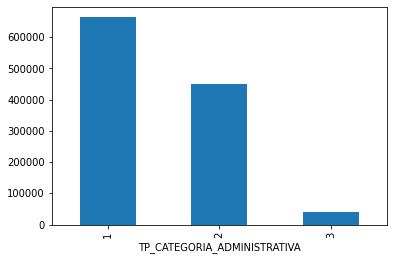

In [18]:
dados_alunos.groupby(['TP_CATEGORIA_ADMINISTRATIVA'])['TP_CATEGORIA_ADMINISTRATIVA'].count().plot(kind='bar')

In [19]:
dados_meninas['Código IES'].sort_values().unique()

array([    2,     4,     8,    43,    55,    57,    76,   344,   423,
         532,   569,   572,   574,   575,   577,   579,   580,   583,
         584,   585,   586,   588,   589,   590,   599,   601,   719,
         756,  1303,  1807,  1811,  1813,  3162,  3164,  3172,  3183,
        3189,  3279,  3543,  4504,  4925,  5322, 14724, 15520])

In [20]:
df = pd.merge(dados_alunos, dados_meninas, left_on='CO_IES', right_on='Código IES')

In [21]:
df['Código IES'].sort_values().unique()

array([    2,     4,     8,    43,    55,    57,    76,   569,   572,
         574,   575,   577,   579,   580,   583,   584,   585,   586,
         588,   589,   590,   599,   601,   719,   756,  1303,  1807,
        1811,  1813,  3162,  3164,  3172,  3183,  3189,  3279,  4504,
        4925,  5322, 14724, 15520])

As universidades que não aparecem na base mergeada são particulares

In [22]:
dados_meninas.loc[dados_meninas['Código IES'].isin([344, 423, 532, 3543])]

,Válido,Nome do Projeto,Status,Ano,Ano de Finalização,Contato,Cidade,Estado,Universidade,Campus,Nome do Projeto - Ativos,Código IES,Código Curso
98,True,Meninas Digitais na Computação – UNIJUI,Ativo,2019,-,meninasdigitaisunijui@gmail.com,IJUÍ,RS,UNIJUI,Campus Ijuí II,Projeto Meninas Digitais na Computação - UNIJUI,532,110974
99,True,Meninas Digitais na IENH,Ativo,2019,-,https://ienh.com.br/meninasdigitais,Novo Hamburgo,RS,Faculdade IENH,CAMPUS SEDE,Meninas Digitais IENH,3543,"119946, 1283122"
106,True,Meninas Digitais Tchê Missões,Ativo,2016,-,"meninasdigitais@san.uri.br, meninasdigitais@sa...",Santo Ângelo,RS,URI Campus de Santo Ângelo,Campus de Santo Ângelo,Meninas Digitais Tchê Missões,423,"64076, 88180"
148,True,Techno Girls,Ativo,2018,-,unatechnogirls@gmail.com,Belo Horizonte,MG,Centro Universitário Una,Campus Unatec Barreiro,Techno Girls,344,"53405, 72981, 72983, 92834, 1161428, 1205761,..."


salvando a base criada

In [23]:
df.head()

,NU_ANO_CENSO,CO_IES,TP_CATEGORIA_ADMINISTRATIVA,TP_ORGANIZACAO_ACADEMICA,CO_CURSO,CO_CURSO_POLO,TP_TURNO,TP_GRAU_ACADEMICO,TP_MODALIDADE_ENSINO,TP_NIVEL_ACADEMICO,...,Ano,Ano de Finalização,Contato,Cidade,Estado,Universidade,Campus,Nome do Projeto - Ativos,Código IES,Código Curso
0,2009,588,1,1,69282,NaN,NaN,3.0,1,1,...,2013,-,http://emilias.dainf.ct.utfpr.edu.br/,Curitiba,PR,Universidade Tecnológica Federal do Paraná,CÂMPUS CURITIBA - Sede CENTRO / CURITIBA (SEDE),Emili@s,588,"106102, 115582, 69282, 21191"
1,2009,588,1,1,69282,NaN,NaN,3.0,1,1,...,2019,-,sabim@utfpr.edu.br,Curitiba,PR,Universidade Tecnológica Federal do Paraná – c...,CÂMPUS CURITIBA - Sede CENTRO\t,TIChers,588,115582
2,2009,588,1,1,45480,NaN,NaN,3.0,1,1,...,2013,-,http://emilias.dainf.ct.utfpr.edu.br/,Curitiba,PR,Universidade Tecnológica Federal do Paraná,CÂMPUS CURITIBA - Sede CENTRO / CURITIBA (SEDE),Emili@s,588,"106102, 115582, 69282, 21191"
3,2009,588,1,1,45480,NaN,NaN,3.0,1,1,...,2019,-,sabim@utfpr.edu.br,Curitiba,PR,Universidade Tecnológica Federal do Paraná – c...,CÂMPUS CURITIBA - Sede CENTRO\t,TIChers,588,115582
4,2009,588,1,1,85822,NaN,NaN,3.0,1,1,...,2013,-,http://emilias.dainf.ct.utfpr.edu.br/,Curitiba,PR,Universidade Tecnológica Federal do Paraná,CÂMPUS CURITIBA - Sede CENTRO / CURITIBA (SEDE),Emili@s,588,"106102, 115582, 69282, 21191"


In [24]:
df.CO_IES.sort_values().unique()

array([    2,     4,     8,    43,    55,    57,    76,   569,   572,
         574,   575,   577,   579,   580,   583,   584,   585,   586,
         588,   589,   590,   599,   601,   719,   756,  1303,  1807,
        1811,  1813,  3162,  3164,  3172,  3183,  3189,  3279,  4504,
        4925,  5322, 14724, 15520])

In [25]:
df.to_csv('alunos_projeto.csv', index=False)